In [1]:
from IPython.display import Latex

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.backends.backend_pdf import PdfPages
from scipy.optimize import curve_fit

pp = PdfPages('multipage.pdf')

<IPython.core.display.Latex object>

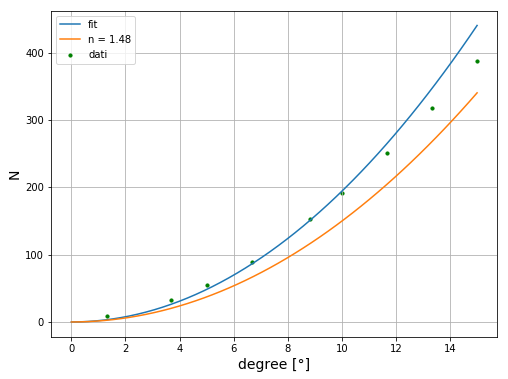

In [2]:
plt.rcParams['figure.figsize'] = (8,6)
lambda_nom = 532e-9
t = 8e-3

f = lambda x, n: 2*t*(1-np.cos(x))*(n-1)/(n*lambda_nom - lambda_nom*(1-np.cos(x)))
# f_lambda = lambda x, n: 2*t*(1-np.cos(x))*(n-1)/(n*lambda_nom - lambda_nom*(1-np.cos(x)))
df = pd.read_csv('data/N.csv')
df['delta_N'] = df['N'] // 15 + 1
popt, pcov = curve_fit(f, df.alpha.values*np.pi/180, df.N.values, p0=[1.3], sigma=df.delta_N.values)
perr = np.sqrt(np.diag(pcov))
display(Latex(f'$n = {popt[0]:.3f} \pm {perr[0]:.3f}$'))

x_ = np.linspace(0, 15*np.pi/180)
plt.scatter(df.alpha, df.N, s=10, label='dati', color='g')
plt.plot(x_*180/np.pi, f(x_, *popt), label='fit')
plt.plot(x_*180/np.pi, f(x_, 1.48), label='n = 1.48')
plt.xlabel('degree [°]', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.grid()
plt.legend()
pp.savefig()
plt.show()

<IPython.core.display.Latex object>

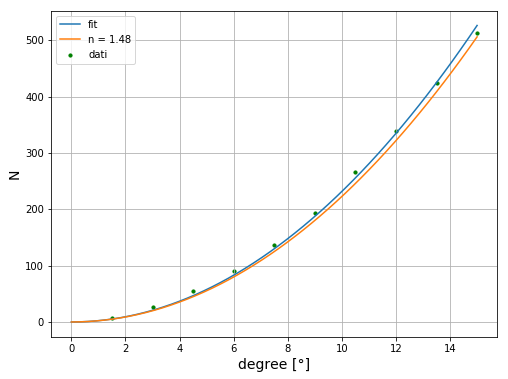

In [3]:
plt.rcParams['figure.figsize'] = (8,6)
lambda_piano = 33e-6 * 2 / 114
lambda_circolare = 22e-6 * 2 / 76
lambda_ = np.mean([lambda_circolare, lambda_piano])
t = 11.9e-3

f = lambda x, n: 2*t*(1-np.cos(x))*(n-1)/(n*lambda_nom - lambda_nom*(1-np.cos(x)))
df = pd.read_csv('data/N_1.csv')
df['delta_N'] = df['N'] // 15 + 1
popt, pcov = curve_fit(f, df.alpha.values*np.pi/180, df.N.values, p0=[1.4])
perr = np.sqrt(np.diag(pcov))
display(Latex(f'$n = {popt[0]:.2f} \pm {perr[0]:.2f}$'))

x_ = np.linspace(0, 15*np.pi/180)
plt.scatter(df.alpha, df.N, s=10, label='dati', color='g')
plt.plot(x_*180/np.pi, f(x_, *popt), label='fit')
plt.plot(x_*180/np.pi, f(x_, 1.48), label='n = 1.48')
plt.grid()
plt.xlabel('degree [°]', fontsize=14)
plt.ylabel('N', fontsize=14)
plt.legend()
pp.savefig()
plt.show()

In [4]:
lambda_piano = 33e-6 * 2 / 114
lambda_circolare = 22e-6 * 2 / 76
lambda_ = np.mean([lambda_circolare, lambda_piano])
delta_x = 1e-6/np.sqrt(12)

delta_lambda_lin = np.sqrt((delta_x / 33e-6)**2 + ((114 // 15) / 114)**2) * lambda_piano / 2
delta_lambda_circ = np.sqrt((delta_x / 22e-6)**2 + ((76 // 15) / 76)**2) * lambda_circolare / 2

delta_lambda = np.sqrt(delta_lambda_lin**2 + delta_lambda_circ**2) / 2
Latex(f'$\lambda = ({int(lambda_*1e9)} \pm {int(delta_lambda*1e9)})\ nm$')

<IPython.core.display.Latex object>

In [5]:
pp.close()